In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\vikra\OneDrive\Desktop\PROJECTS\Industrial Copper Modeling\Copper_Set.xlsx - Result 1.csv")

In [3]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [4]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [6]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [7]:
print(len(df['item_date'].unique())) #
print(len(df['customer'].unique())) #
print(len(df['material_ref'].unique()))
print(len(df['product_ref'].unique())) #
print(len(df['delivery date'].unique()))

253
1170
16564
33
29


In [8]:
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [9]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


In [10]:
df['material_ref'].fillna('unknown', inplace=True)
# deleting the remaining null values as they are less than 1% of data which can be neglected
df = df.dropna()

In [11]:
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [12]:

df_p=df.copy()

# PlottinG

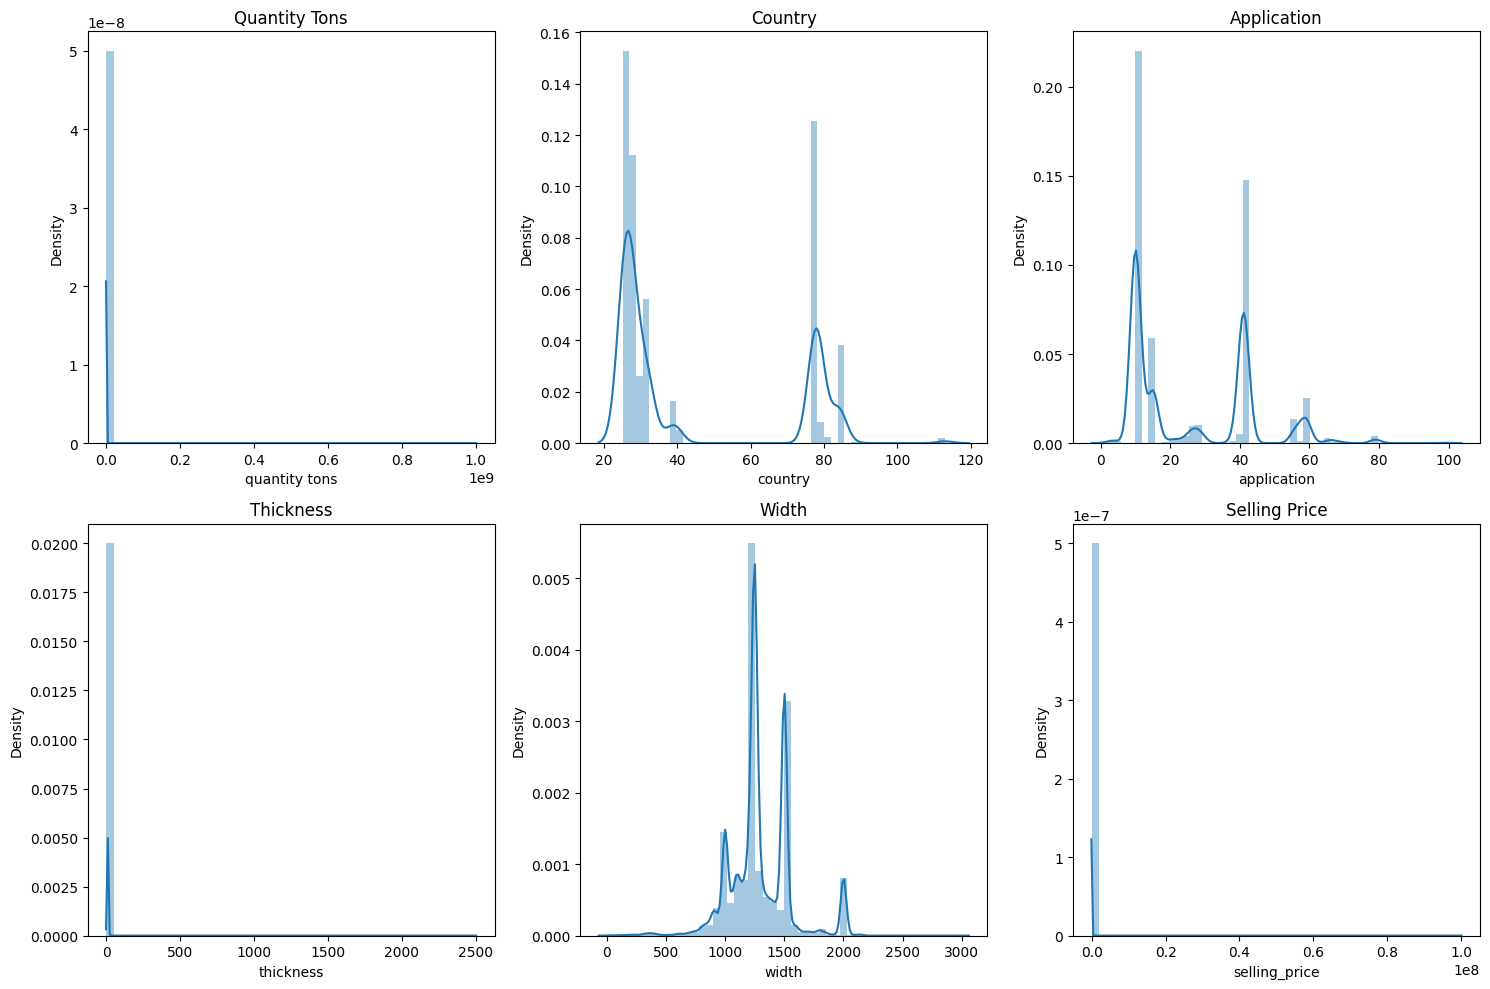

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a grid of plots with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plotting each distribution on a different subplot
sns.distplot(df_p['quantity tons'], ax=axes[0, 0])
axes[0, 0].set_title('Quantity Tons')

sns.distplot(df_p['country'], ax=axes[0, 1])
axes[0, 1].set_title('Country')

sns.distplot(df_p['application'], ax=axes[0, 2])
axes[0, 2].set_title('Application')

sns.distplot(df_p['thickness'], ax=axes[1, 0])
axes[1, 0].set_title('Thickness')

sns.distplot(df_p['width'], ax=axes[1, 1])
axes[1, 1].set_title('Width')

sns.distplot(df_p['selling_price'], ax=axes[1, 2])
axes[1, 2].set_title('Selling Price')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [14]:

df_p.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [15]:
mask1 = df_p['selling_price'] <= 0
print(mask1.sum())
df_p.loc[mask1, 'selling_price'] = np.nan

mask1 = df_p['quantity tons'] <= 0
print(mask1.sum())
df_p.loc[mask1, 'quantity tons'] = np.nan

mask1 = df_p['thickness'] <= 0
print(mask1.sum())

7
4
0


In [16]:
df_p.dropna(inplace=True)

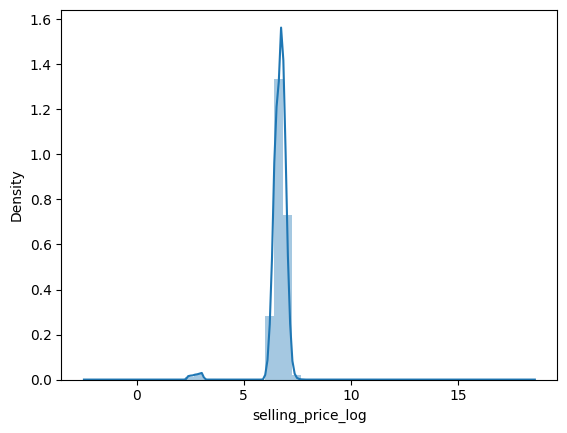

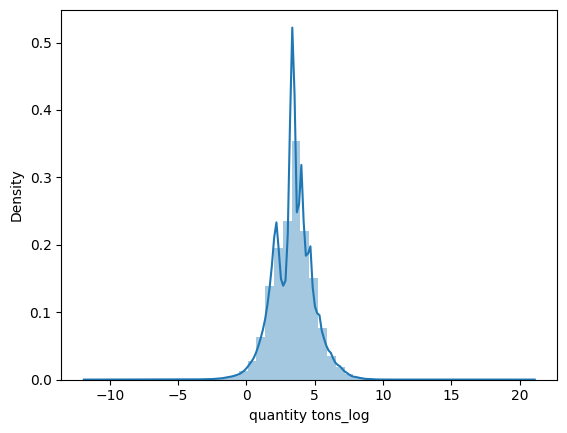

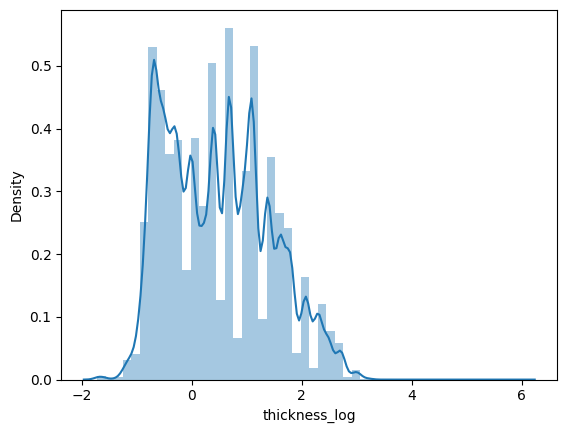

In [17]:
df_p['selling_price_log'] = np.log(df_p['selling_price'])
sns.distplot(df_p['selling_price_log'])
plt.show()

df_p['quantity tons_log'] = np.log(df_p['quantity tons'])
sns.distplot(df_p['quantity tons_log'])
plt.show()

df_p['thickness_log'] = np.log(df_p['thickness'])
sns.distplot(df_p['thickness_log'])
plt.show()

In [18]:
x=df_p[['quantity tons_log','application','thickness_log','width','selling_price_log','country','customer','product_ref']].corr()

<Axes: >

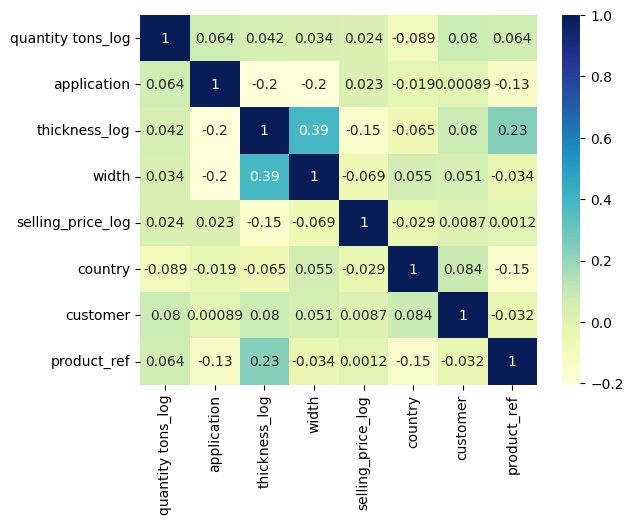

In [19]:

sns.heatmap(x, annot=True, cmap="YlGnBu")

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [21]:
X=df_p[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=df_p['selling_price_log']

In [22]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X[['status']])
X_be = ohe2.fit_transform(X[['status']]).toarray()

In [23]:
X = np.concatenate((X[['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [24]:
X

array([[ 0.41506739, -0.87956189,  0.22814024, ..., -0.15323927,
         0.75215932, -0.00234649],
       [ 2.25042993,  0.8665426 , -0.75339772, ..., -0.15323927,
         0.75215932, -0.00234649],
       [ 1.77453529,  0.13430523, -1.55084831, ..., -0.15323927,
         0.75215932, -0.00234649],
       ...,
       [ 1.34669579,  0.8665426 , -0.56931035, ..., -0.15323927,
         0.75215932, -0.00234649],
       [-1.34846834,  0.8665426 , -0.88124292, ..., -0.15323927,
         0.75215932, -0.00234649],
       [ 1.81043496,  0.8665426 , -0.88124292, ..., -0.15323927,
         0.75215932, -0.00234649]])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# decision tree
dtr = DecisionTreeRegressor()
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10}


In [26]:

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [27]:
y_pred

array([6.87441572, 7.01300036, 6.56776759, ..., 6.78445706, 6.80077594,
       6.45924701])

In [28]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 0.028966978882695858
R-squared: 0.9100881906469287


In [29]:
new_sample = np.array([[np.log(40), 10, np.log(250), 0, 28,30202938,1670798778,'PL','Won']])
new_sample_ohe = ohe.transform(new_sample[:, [7]]).toarray()
new_sample_be = ohe2.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Predicted selling price:', np.exp(new_pred))

Predicted selling price: [715.59007462]


In [30]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('t.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('s.pkl', 'wb') as f:
    pickle.dump(ohe2, f)

In [31]:
X[1].size

23

In [32]:

new_sample.size

23

In [33]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [34]:
df["status"].value_counts()

status
Won                116004
Lost                34431
Not lost for AM     19568
Revised              4276
To be approved       4167
Draft                3121
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64

In [35]:

df_c = df_p[df_p['status'].isin(['Won', 'Lost'])]
df_class=df_c[[ 'customer','country',
               'item type','application','width',
               'product_ref','selling_price_log',
               'quantity tons_log','thickness_log']]
Y=df_c['status']
X = df_class

In [36]:
X.head()

,customer,country,item type,application,width,product_ref,selling_price_log,quantity tons_log,thickness_log
0,30156308.0,28.0,W,10.0,1500.0,1670798778,6.749931,3.991779,0.693147
1,30202938.0,25.0,W,41.0,1210.0,1668701718,6.953684,6.643822,-0.223144
2,30153963.0,30.0,WI,28.0,952.0,628377,6.468211,5.956169,-0.967584
3,30349574.0,32.0,S,59.0,1317.0,1668701718,6.643790,5.310301,0.832909
4,30211560.0,28.0,W,10.0,2000.0,640665,6.357842,6.666354,1.386294


<Axes: ylabel='count'>

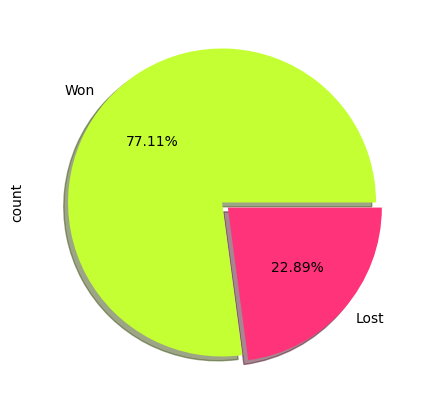

In [37]:
Y.value_counts().plot(kind = 'pie', autopct = '%0.2f%%', figsize = [5,5], explode = [0,0.05],
                                       colors = ['#C4FF33', '#FF337A'], shadow = True)

In [38]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, Y)

In [39]:
X_resampled


,customer,country,item type,application,width,product_ref,selling_price_log,quantity tons_log,thickness_log
171,30223403.0,78.0,W,10.0,1500.0,1668701718,7.133296,2.165480,0.000000
174,30165992.0,77.0,S,10.0,1500.0,164141591,7.110696,3.677655,0.000000
175,30223403.0,78.0,W,10.0,1500.0,1668701718,7.078342,2.438388,1.386294
176,30165992.0,77.0,S,10.0,1250.0,164141591,7.130099,3.628480,-0.223144
179,30223403.0,78.0,W,10.0,1500.0,1668701718,7.157735,2.331328,-0.223144
...,...,...,...,...,...,...,...,...,...
6335,30226969.0,27.0,W,59.0,1220.0,628377,6.785588,4.248436,0.270027
19780,30209332.0,27.0,S,10.0,1500.0,628377,6.942157,3.918841,0.405465
179475,30200964.0,25.0,W,41.0,1245.0,611993,7.070350,4.868203,-0.765718
1925,30268176.0,27.0,W,27.0,935.0,1670798778,6.823286,2.323090,1.178655


<Axes: ylabel='count'>

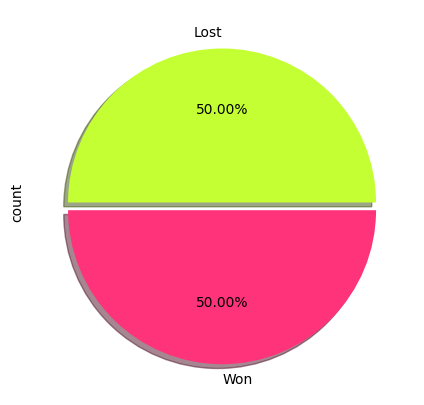

In [40]:
y_resampled.value_counts().plot(kind = 'pie', autopct = '%0.2f%%', figsize = [5,5], explode = [0,0.05],
                                       colors = ['#C4FF33', '#FF337A'], shadow = True)

In [41]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_resampled[['item type']])
X_ohe = ohe.fit_transform(X_resampled[['item type']]).toarray()

In [42]:
from sklearn.preprocessing import LabelBinarizer

be = LabelBinarizer()
be.fit(y_resampled) 
Y_fit = be.fit_transform(y_resampled)

In [43]:

x = np.concatenate((X_resampled[[ 'customer','country',
               'application','width',
               'product_ref','selling_price_log',
               'quantity tons_log','thickness_log']].values, X_ohe), axis=1)

In [44]:

scaler = StandardScaler()
X = scaler.fit_transform(x)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_fit, test_size=0.2, random_state=42)

In [46]:
from sklearn.ensemble import RandomForestClassifier
dtr_class = RandomForestClassifier()


In [47]:
dtr_class.fit(X_train, y_train)

RandomForestClassifier()

In [48]:

y_pred = dtr_class.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve,auc

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.9140347055833878
Confusion Matrix:
[[6427  380]
 [ 804 6162]]


In [50]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      6807
           1       0.94      0.88      0.91      6966

    accuracy                           0.91     13773
   macro avg       0.92      0.91      0.91     13773
weighted avg       0.92      0.91      0.91     13773



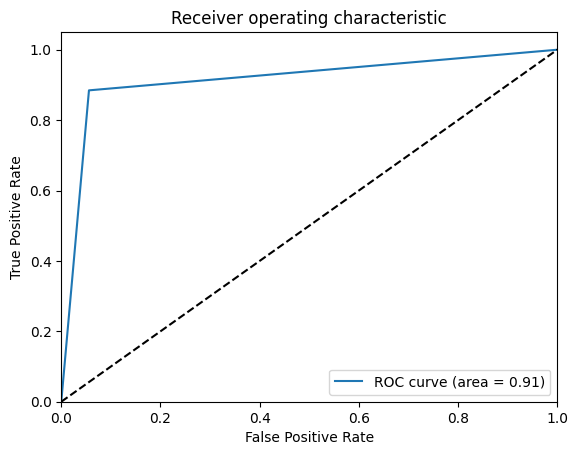

In [51]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [52]:
# Saving the model
import pickle
with open('cmodel.pkl', 'wb') as file:
    pickle.dump(dtr_class, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(ohe, f)

In [53]:
customer=30202938
country=25
application =41
width =1265
product_ref = 11.419608358
selling_price_out =111.89060912
quantity_tons_log =np.log(1.77285681)
thickness_log =np.log(5.419608358)
status='W'

In [54]:
# Predict the status for a new sample
# 'quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe
new_sample = np.array([[customer, country, application, width,product_ref,selling_price_out,quantity_tons_log,thickness_log,status]])
new_sample_ohe = ohe.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
new_sample = scaler.transform(new_sample)
new_pred =dtr_class.predict(new_sample)
print(new_pred)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

[1]
The status is: Won


In [55]:
def predict_lead_status(row):
    # Extract features from the row (use the correct column names)
    new_sample = np.array([[row['customer'], row['country'], row['application'], row['width'],
                            row['product_ref'], row['selling_price'], row['quantity tons'], 
                            row['thickness'], row['status']]])
    
    # One-Hot Encoding the 'status' column (or other categorical columns as needed)
    new_sample_ohe = ohe.transform(new_sample[:, [8]]).toarray()

    # Concatenate the one-hot encoded 'status' with the other features
    new_sample = np.concatenate((new_sample[:, [0, 1, 2, 3, 4, 5, 6, 7]], new_sample_ohe), axis=1)

    # Scale the features using the scaler
    new_sample = scaler.transform(new_sample)

    # Predict the status using the trained model
    new_pred = dtr_class.predict(new_sample)

    # Return the first element as a scalar
    return new_pred[0]

# Apply the prediction function to each row in the dataset
df['Predicted_Status'] = df.apply(predict_lead_status, axis=1)

# Map the predicted status to 'WON' and 'LOST'
df['Predicted_Status_Label'] = df['Predicted_Status'].map({1: 'WON', 0: 'LOST'})

# Display the result
print(df[['customer', 'Predicted_Status_Label']])

          customer Predicted_Status_Label
0       30156308.0                    WON
1       30202938.0                    WON
2       30153963.0                    WON
3       30349574.0                    WON
4       30211560.0                    WON
...            ...                    ...
181668  30200854.0                    WON
181669  30200854.0                    WON
181670  30200854.0                    WON
181671  30200854.0                    WON
181672  30200854.0                    WON

[181631 rows x 2 columns]


In [57]:
# Assuming df has the 'Predicted_Status_Label' column
won_data = df[df['Predicted_Status_Label'] == 'WON']
lost_data = df[df['Predicted_Status_Label'] == 'LOST']

# Optional: Reset the index for better readability
won_data.reset_index(drop=True, inplace=True)
lost_data.reset_index(drop=True, inplace=True)


In [58]:
# Save the WON dataset to a CSV file
won_data.to_csv('won_data.csv', index=False)

# Save the LOST dataset to a CSV file
lost_data.to_csv('lost_data.csv', index=False)

print("CSV files have been created: 'won_data.csv' and 'lost_data.csv'")

CSV files have been created: 'won_data.csv' and 'lost_data.csv'
